**Classifying Muffins and Cupcakes with SVM**

__Step 1:__ Import Packages

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

__Step 2:__ Import Data

In [2]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


__Step 3:__ Prepare the Data

C:\Users\DSP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


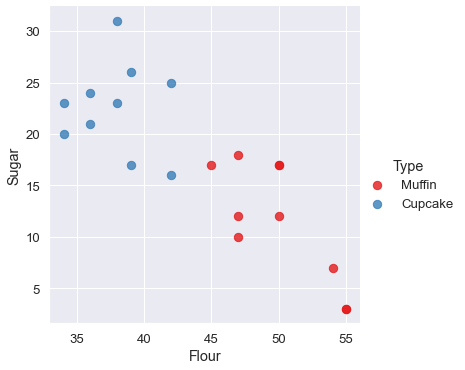

In [3]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [4]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']]
type_label = np.where(recipes['Type']=='Muffin', 0, 1)


__Step 4:__ Fit the Model

In [5]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

__Step 5:__ Visualize Results

In [6]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

C:\Users\DSP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


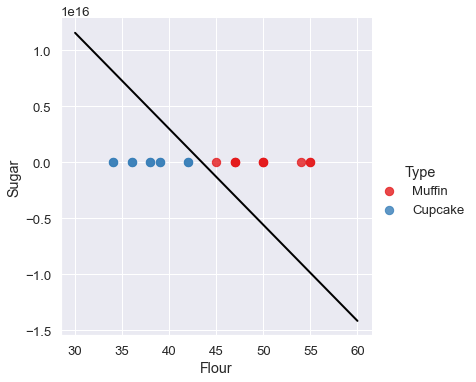

In [7]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [8]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\Users\DSP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


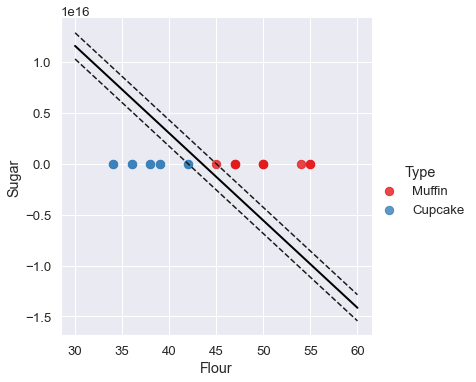

In [9]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

__Step 6:__ Predict New Case

In [10]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [11]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


C:\Users\DSP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


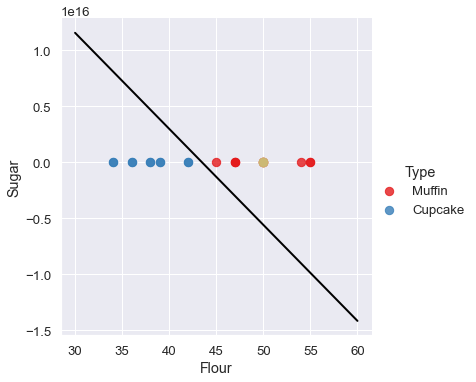

In [12]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [13]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!
